In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from IPython.display import display
from ipywidgets import interact
pd.set_option('max_rows', 5)
%matplotlib inline

## 考えてみる
---
1変数のデータを視覚的に表現する手法で知っているものを挙げる。

## GUIで実行してみる

### 分布の確認
---
RStudio の Console に`library(Rcmdr)`と入力して、 R commander を起動。

- `データ` -> `データのインポート` -> `テキストファイルまたはクリップボード, URLから`

として、`ファイル内に変数名あり`のチェックを外し、`フィールドの区切り記号`を`カンマ`にし、`OK`をクリック。

`workspace/beginner/data/islands.csv`を読み込む。  
`データセットを表示`をクリックし、内容を確認。

- `データ` -> `アクティブデータセット` -> `ケース名の設定`

として、`V1`を選択し、`OK`をクリック。

再度データセットを確認。

- `グラフ` -> `ヒストグラム`

としてヒストグラムを表示。

### 外れ値の確認
---
RStudio の Console に`library(Rcmdr)`と入力して、 R commander を起動。

- `データ` -> `データのインポート` -> `テキストファイルまたはクリップボード, URLから`

として、`フィールドの区切り記号`を`カンマ`にし、`OK`をクリック。

`workspace/beginner/data/InsectSprays.csv`を読み込む。  
`データセットを表示`をクリックし、内容を確認。

- `グラフ` -> `箱ひげ図`

として、`層別のプロット`から`spray`を選択し、箱ひげ図を表示。

## 棒グラフ (bar plot)
---
**カテゴリ別**の数量を把握するのに用いる。

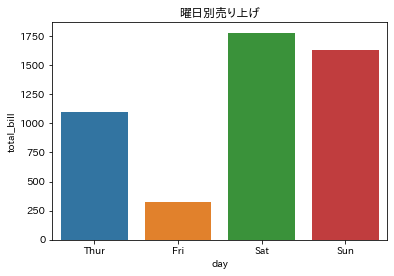

In [2]:
from helpers.visualization import bar_plot
bar_plot.show()

### Pythonでの棒グラフ表示
---
`seaborn.barplot`、`pandas.DataFrame.plot.bar`、`matplotlib.pyplot.bar`などを用いる。

`seaborn`や`pandas`の機能を用いると綺麗なグラフが簡単に描けるが、どちらも`matplotlib`のラッパーなので細かい調整は`matplotlib`の該当部分のドキュメントを参照する。

In [3]:
tips = pd.read_csv('data/tips.csv')
print('tips')
display(tips)

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
sns.barplot??

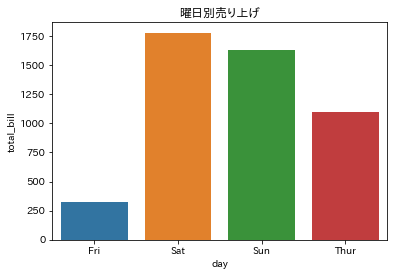

In [5]:
sns.barplot('day', 'total_bill', data=tips.groupby('day').sum().reset_index())
plt.title('曜日別売り上げ')
plt.show()

In [6]:
pd.DataFrame.plot.bar??

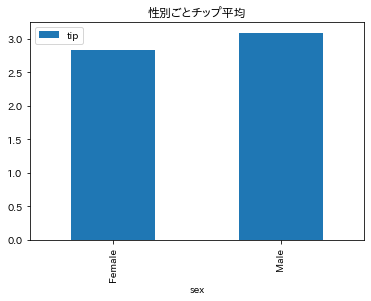

In [7]:
tips.groupby('sex').mean().reset_index().plot.bar('sex', 'tip')
plt.title('性別ごとチップ平均')
plt.show()

In [8]:
plt.bar??

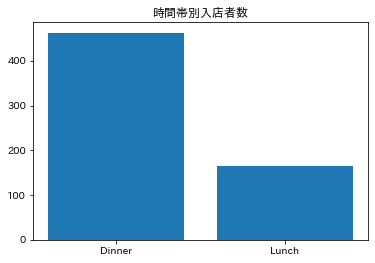

In [9]:
plt.bar('time', 'size', data=tips.groupby('time').sum().reset_index())
plt.title('時間帯別入店者数')
plt.show()

###### 練習問題

tipsデータセットを`smoker`を基準に`total_bill`の平均を集計した以下の`data`を利用して、棒グラフを表示してみる。

In [10]:
data = tips.groupby('smoker').mean()['total_bill']
data

smoker
No     19.188278
Yes    20.756344
Name: total_bill, dtype: float64

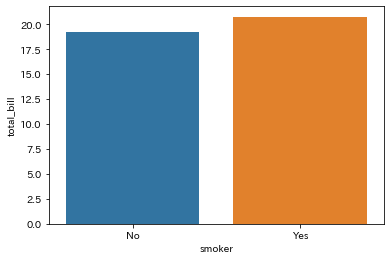

In [11]:
sns.barplot(data.index, data)
plt.show()

## ヒストグラム (histogram)
---
横軸に階級 (値の範囲) 、縦軸に度数 (頻度) をとったグラフ。  
**データ分布の形や偏り**がないかなどを確認するのに利用する。

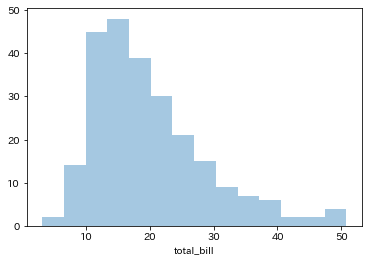

In [12]:
from helpers.visualization import histogram
histogram.show()

山が複数ある場合には、性質の異なる複数のグループが混在している可能性がある。  
外れ値をどこに設定するか、区間の数をいくつに設定するかなどで印象が全く異なるので、複数表示して確認する。

###### 練習問題

以下を実行する関数`histogram`を完成させる。
1. `pandas.cut`を使い、`tips`データセットのカラム`tip`を等間隔の`10`階級に分割する。
1. 分割した階級別のデータ数を集計し棒グラフを描画して、自分でヒストグラムを作ってみる。

In [13]:
pd.cut??

In [14]:
def histogram(series):
    # pd.cutを使い、階級を分割
    
    # 'label'カラムにx軸、'tip'カラムにy軸の値が入ったデータフレームdfを作成する

    df.plot.bar('label', 'tip', width=1.0, color=sns.color_palette()[0])
    plt.xticks(rotation=45)
    plt.show()

In [15]:
def histogram(series):
    bins = pd.cut(series, 10, include_lowest=True)
    ax = bins.groupby(bins).count().rename_axis(
        'label', axis='index').reset_index().plot.bar(
            'label', 'tip', width=1.0, color=sns.color_palette()[0])
    for label in ax.get_xticklabels():
        label.set(rotation=45)
    plt.show()

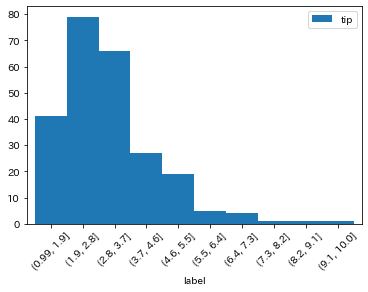

In [16]:
histogram(tips['tip'])

### Pythonでのヒストグラム表示
---
`seaborn.distplot`、`pandas.DataFrame.hist`、`matplotlib.pyplot.hist`などを用いる。

In [17]:
sns.distplot??

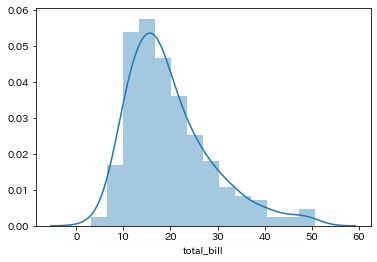

In [18]:
sns.distplot(tips['total_bill'])
plt.show()

In [19]:
pd.DataFrame.hist??

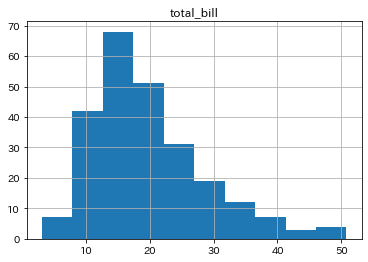

In [20]:
tips.hist('total_bill')
plt.show()

In [21]:
plt.hist??

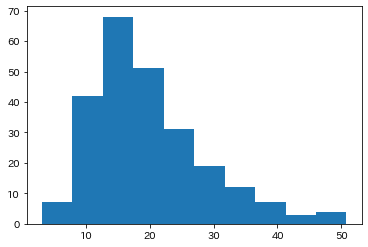

In [22]:
plt.hist('total_bill', data=tips)
plt.show()

###### 練習問題

`bins`を`10, 20, ... ,100`と変えてみて、ヒストグラムから受ける印象を比べてみる。

In [23]:
@interact(bins=(10, 100, 10))
def plot(bins=10):
    ax = plt.gca()
    ax.hist('total_bill', data=tips, bins=bins)

interactive(children=(IntSlider(value=10, description='bins', min=10, step=10), Output()), _dom_classes=('widg…

## 箱ひげ図 (box plot)
---
中央値・四分位点・外れ値を一度に可視化できるグラフ。

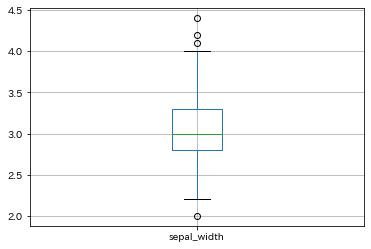

In [24]:
from helpers.visualization import boxplot
boxplot.show()

- 四角 (箱) の上下間 = 四分位範囲 (25%点 ~ 75%点)
- 四角 (箱) の中の線 = 中央値
- 上下に伸びた線 (ひげ) = 箱の上 (下) から箱の高さの1.5倍を延長した範囲内で最大 (最小) のデータ点 (データの最小値・最大値は超えない)
- 上下の点 = 外れ値

###### 練習問題

箱ひげ図を描画する関数`boxplot`を完成させる。

In [25]:
sepal_width = sns.load_dataset('iris')['sepal_width']
print('sepal_width')
display(sepal_width)

sepal_width


0      3.5
1      3.0
      ... 
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [26]:
def boxplot(nparray):
    # 変数medianに中央値を代入

    # 変数box_limに箱の下限・上限を配列で代入

    # 変数boundaryにひげの下限・上限を配列で代入

    show(nparray, median, box_lim, boundary)

In [27]:
def show(nparray, median, box_lim, boundary):
    color = 'blue'
    box_width = 1
    box_low, box_high = min(box_lim), max(box_lim)
    interquartile_range = box_high - box_low
    boundary_low, boundary_high = min(boundary), max(boundary)
    ax = plt.gca()
    y = nparray[np.logical_or(nparray < boundary_low, boundary_high < nparray)]
    ax.scatter(np.zeros_like(y), y)
    ax.vlines(0, boundary_low, boundary_high, zorder=-1)
    ax.hlines(boundary, -box_width / 4, box_width / 4)
    patch = Rectangle((-box_width / 2, box_low),
                      box_width,
                      interquartile_range,
                      edgecolor=color,
                      facecolor='white')
    ax.add_patch(patch)
    ax.hlines(median, -box_width / 2, box_width / 2, color=color)
    ax.set(xlim=(-box_width, box_width), xticks=())
    plt.show()

In [28]:
def boxplot(nparray):
    median = np.median(nparray)
    box_lim = np.percentile(nparray, (25, 75))
    interquartile_range = box_lim[1] - box_lim[0]
    boundary_min = nparray[
        nparray >= box_lim[0] - interquartile_range * 1.5].min()
    boundary_max = nparray[
        nparray <= box_lim[1] + interquartile_range * 1.5].max()
    boundary = [boundary_min, boundary_max]
    show(nparray, median, box_lim, boundary)

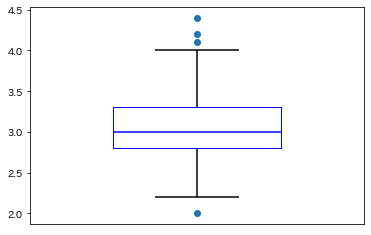

In [29]:
boxplot(sepal_width)

### Pythonでの箱ひげ図表示
---
`seaborn.boxplot`、`pandas.DataFrame.boxplot`、`matplotlib.pyplot.boxplot`などを用いる。

In [30]:
iris = sns.load_dataset('iris').drop(columns='species')
print('iris')
display(iris)

iris


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
...,...,...,...,...
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [31]:
sns.boxplot??

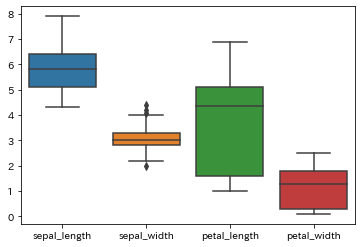

In [32]:
sns.boxplot(data=iris)
plt.show()

In [33]:
pd.DataFrame.boxplot??

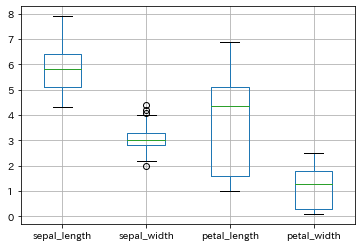

In [34]:
iris.boxplot()
plt.show()

In [35]:
plt.boxplot??

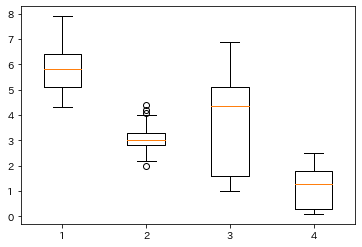

In [36]:
plt.boxplot(iris.T)
plt.show()

###### 練習問題

:todo  
箱ひげ図を描画する演習の追加